In [75]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report

In [76]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url) 

 

In [137]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
df=pd.get_dummies(titanic,columns = ['Sex'],prefix = 'Sex')

In [157]:
df = df.drop(columns = ["PassengerId","Name","Ticket","Embarked","Cabin","Sex_female"])

In [158]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [159]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [83]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\SWETA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SWETA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SWETA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

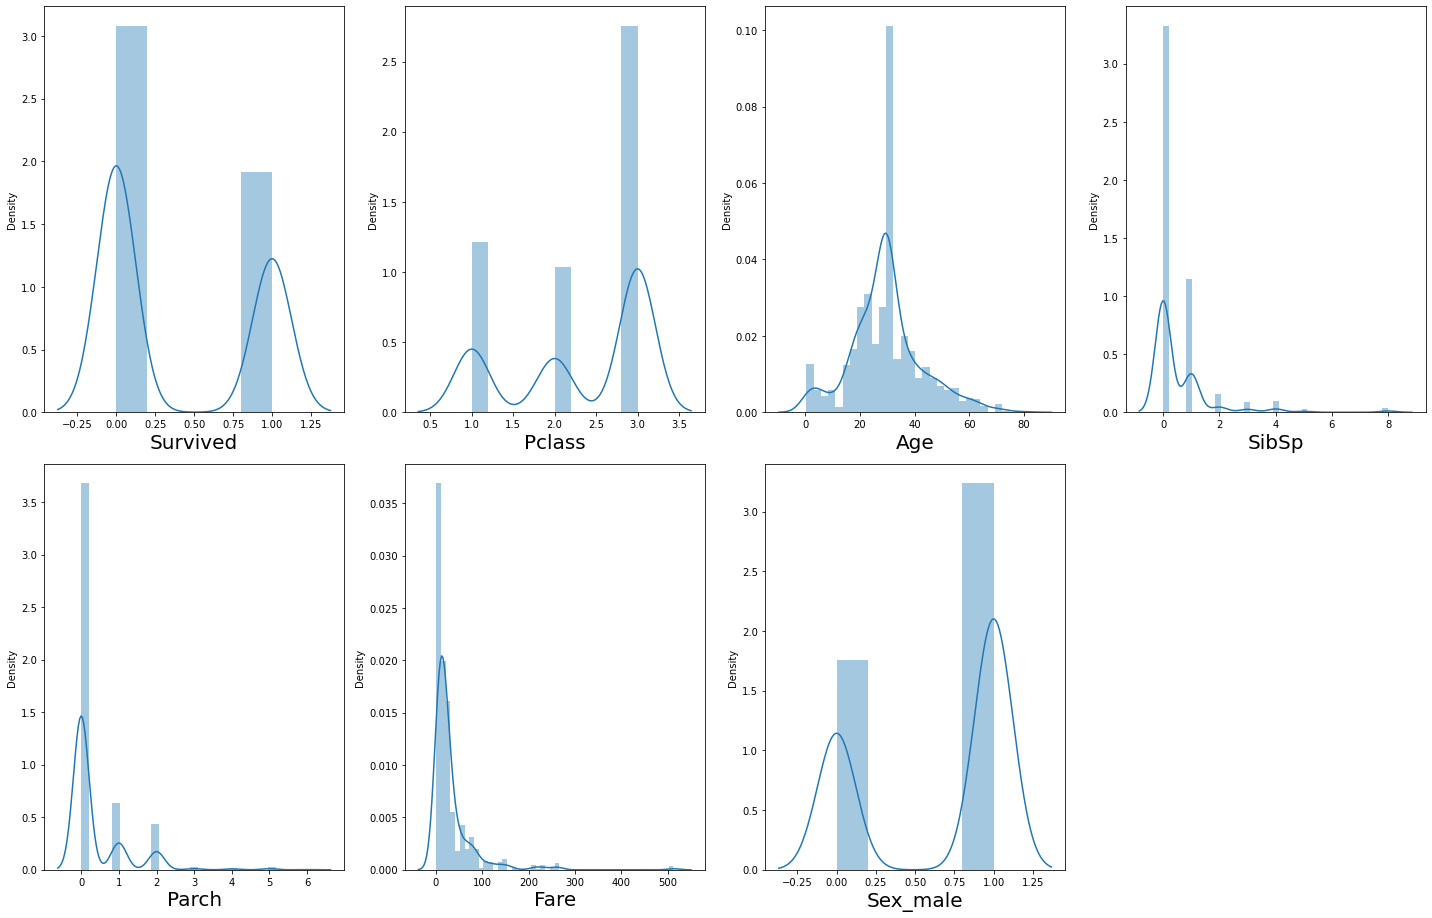

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=20 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

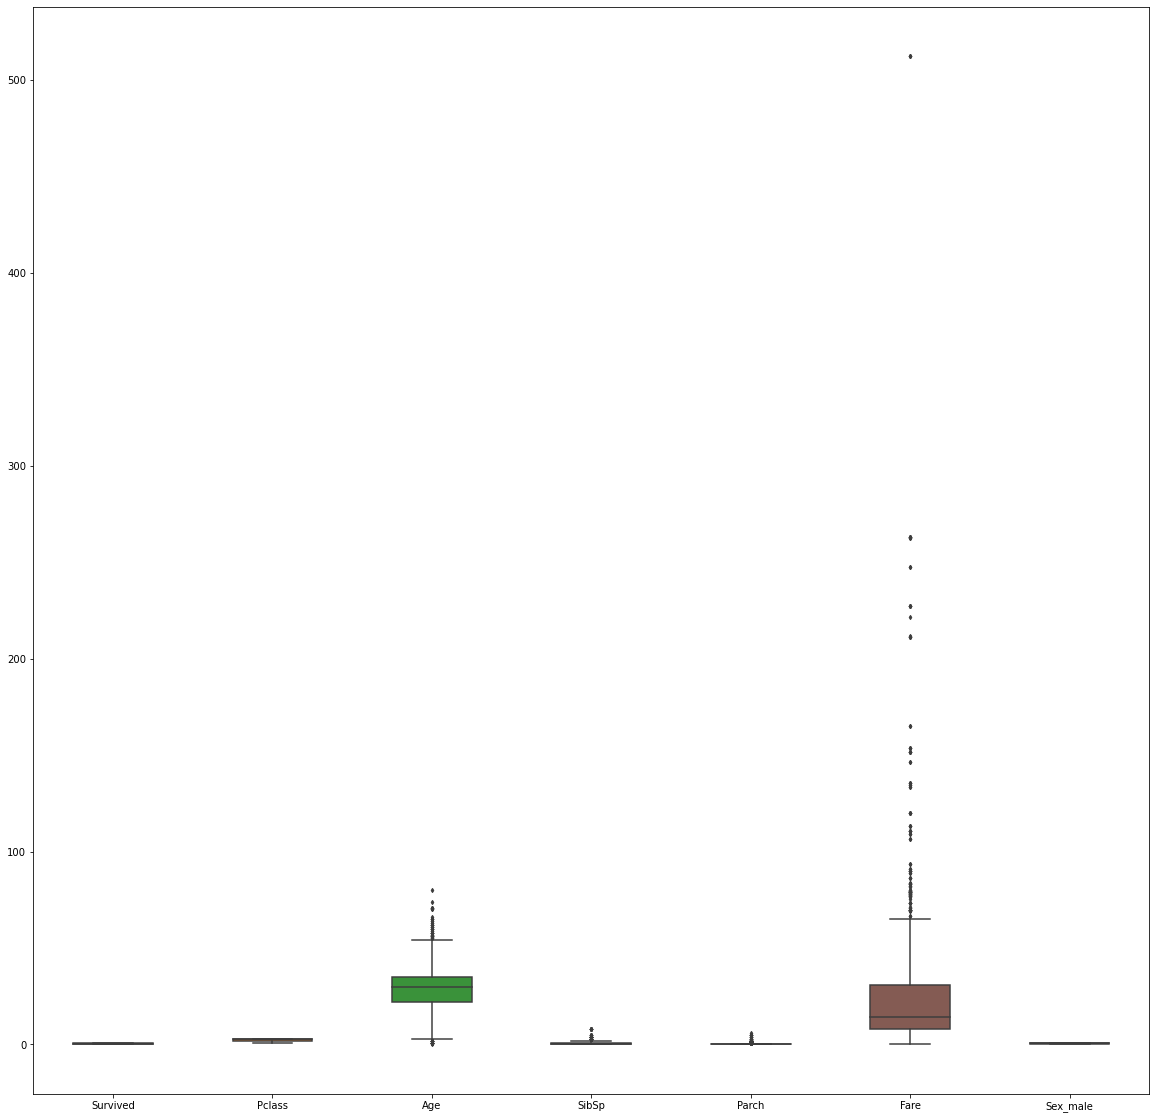

In [195]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [421]:
q = df['Fare'].quantile(0.90)
new_data= df[df['Fare']<q]
len(df),len(new_data)

(891, 801)

<AxesSubplot:>

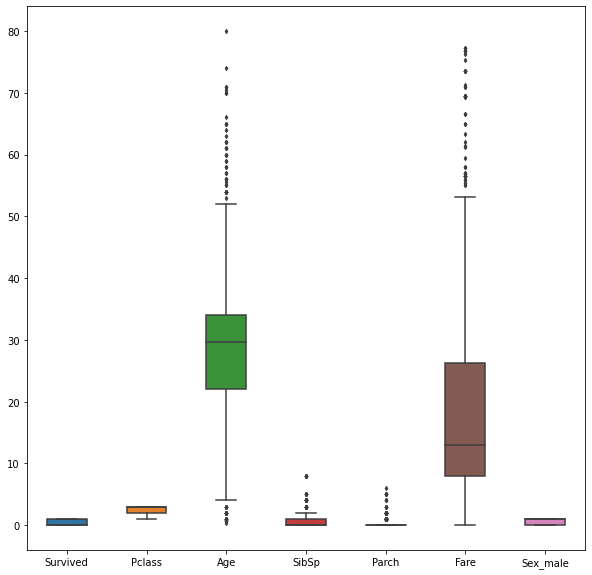

In [422]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)

In [423]:
w = new_data['Parch'].quantile(0.99)
new_data= new_data[new_data['Parch']<w]
len(df),len(new_data)

(891, 792)

<AxesSubplot:>

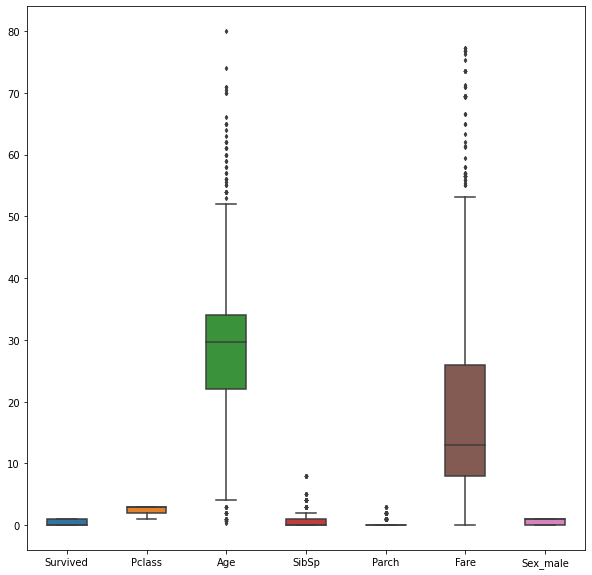

In [424]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)

In [425]:
x = new_data.drop(columns='Survived')
y = new_data.Survived

In [465]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


C:\Users\SWETA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

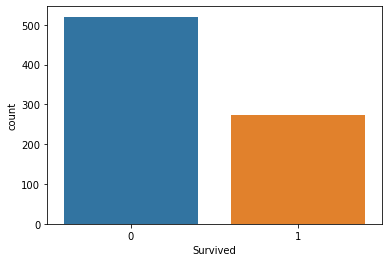

In [435]:
sns.countplot(y)

In [436]:
from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_s,y_s  = rdsmple.fit_resample(x,y)

In [437]:
from sklearn.model_selection import train_test_split , GridSearchCV
x_train , x_test, y_train,y_test = train_test_split(x_s,y_s,test_size = .15,random_state =100)

In [438]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [439]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [440]:
dt_model.score(x_train, y_train)

0.9819004524886877

In [441]:
dt_model.score(x_test, y_test)

0.8782051282051282

In [446]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1)
             }

In [447]:
from sklearn.model_selection import train_test_split , GridSearchCV
grid_ccp = GridSearchCV(estimator=dt_model,param_grid=grid_pram , cv = 5 , n_jobs=-1)

In [450]:
grid_ccp.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [451]:
grid_ccp.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [452]:
dt_model1 = DecisionTreeClassifier(criterion = 'gini', max_depth =7, min_samples_leaf= 7, min_samples_split= 5, splitter ='best')

In [453]:
dt_model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, min_samples_split=5)

In [454]:
dt_model1.score(x_train, y_train)

0.8438914027149321

In [456]:
pred=dt_model1.predict(x_train)

In [457]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
dt_model1_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("Train Result:\n===============")
print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
print("---------------------------------")
print(f"Classification Report:\n{dt_model1_report}")
print("-----------------------------------")
print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")

Train Result:
Accuracy Score:84.39%
---------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.821053    0.870416  0.843891    0.845734      0.845678
recall       0.880361    0.807256  0.843891    0.843809      0.843891
f1-score     0.849673    0.837647  0.843891    0.843660      0.843674
support    443.000000  441.000000  0.843891  884.000000    884.000000
-----------------------------------
Confusion Matrix:
[[390  53]
 [ 85 356]]



In [458]:
dt_model1.score(x_test, y_test)

0.8397435897435898

In [459]:
pred=dt_model1.predict(x_test)

In [460]:
dt_model1_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("Test Result:\n===============")
print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
print("---------------------------------")
print(f"Classification Report:\n{dt_model1_report}")
print("-----------------------------------")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

Test Result:
Accuracy Score:83.97%
---------------------------------
Classification Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.795455   0.897059  0.839744    0.846257      0.846908
recall      0.909091   0.772152  0.839744    0.840621      0.839744
f1-score    0.848485   0.829932  0.839744    0.839208      0.839089
support    77.000000  79.000000  0.839744  156.000000    156.000000
-----------------------------------
Confusion Matrix:
[[70  7]
 [18 61]]



In [463]:
import pickle
filename = 'titanic_model.pickle'
pickle.dump(dt_model1, open(filename, 'wb'))